In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols # ordinary least squares

from sklearn.cluster import KMeans
import sklearn.metrics as metrics
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Visualizing it in bokeh
from bokeh.io import show, output_notebook, push_notebook, output_file
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool, CategoricalColorMapper
from bokeh.palettes import RdBu3
import matplotlib.pyplot as plt
output_notebook()
palette = sns.color_palette(None,4)

Loading BokehJS ...

In [2]:
data = pd.read_csv('candy-data.csv')

In [3]:
print('Shape of the data: ',data.shape)
display(data.head())

Shape of the data:  (85, 13)


,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


### Exploratory data analysis

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
competitorname      85 non-null object
chocolate           85 non-null int64
fruity              85 non-null int64
caramel             85 non-null int64
peanutyalmondy      85 non-null int64
nougat              85 non-null int64
crispedricewafer    85 non-null int64
hard                85 non-null int64
bar                 85 non-null int64
pluribus            85 non-null int64
sugarpercent        85 non-null float64
pricepercent        85 non-null float64
winpercent          85 non-null float64
dtypes: float64(3), int64(9), object(1)
memory usage: 8.8+ KB


In [5]:
# descriptive analysis
data.describe()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,0.435294,0.447059,0.164706,0.164706,0.082353,0.082353,0.176471,0.247059,0.517647,0.478647,0.468882,50.316764
std,0.498738,0.500140,0.373116,0.373116,0.276533,0.276533,0.383482,0.433861,0.502654,0.282778,0.285740,14.714357
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011000,0.011000,22.445341
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.220000,0.255000,39.141056
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.465000,0.465000,47.829754
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.732000,0.651000,59.863998
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.988000,0.976000,84.180290


In [6]:
# check unique variables. 
data['competitorname'].duplicated().sum()

0

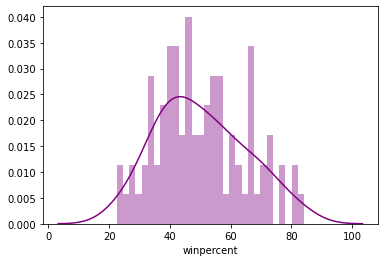

In [7]:
sns.distplot(data['winpercent'],bins=30,color='purple')

In [8]:
# which product got the highest "win" percentage
data.sort_values('winpercent', ascending = False).head(5)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
52,ReeseÕs Peanut Butter cup,1,0,0,1,0,0,0,0,0,0.720,0.651,84.180290
51,ReeseÕs Miniatures,1,0,0,1,0,0,0,0,0,0.034,0.279,81.866257
79,Twix,1,0,1,0,0,1,0,1,0,0.546,0.906,81.642914
28,Kit Kat,1,0,0,0,0,1,0,1,0,0.313,0.511,76.768600
64,Snickers,1,0,1,1,1,0,0,1,0,0.546,0.651,76.673782


In [9]:
# which product got the lowest "win" percentage
data.sort_values('winpercent', ascending = True).head(5)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
44,Nik L Nip,0,1,0,0,0,0,0,0,1,0.197,0.976,22.445341
7,Boston Baked Beans,0,0,0,1,0,0,0,0,1,0.313,0.511,23.417824
12,Chiclets,0,1,0,0,0,0,0,0,1,0.046,0.325,24.524988
72,Super Bubble,0,1,0,0,0,0,0,0,0,0.162,0.116,27.303865
26,Jawbusters,0,1,0,0,0,0,1,0,1,0.093,0.511,28.127439


In [10]:
# top 5 sugar percent
data.sort_values('sugarpercent', ascending = False).head(5)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
54,ReeseÕs stuffed with pieces,1,0,0,1,0,0,0,0,0,0.988,0.651,72.887901
70,Sugar Babies,0,0,1,0,0,0,0,0,1,0.965,0.767,33.437550
38,Milky Way Simply Caramel,1,0,1,0,0,0,0,1,0,0.965,0.860,64.353340
61,Skittles wildberry,0,1,0,0,0,0,0,0,1,0.941,0.220,55.103695
60,Skittles original,0,1,0,0,0,0,0,0,1,0.941,0.220,63.085140


In [11]:
# bottom 5 sugar percent
data.sort_values('sugarpercent', ascending = True).head(5)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
51,ReeseÕs Miniatures,1,0,0,1,0,0,0,0,0,0.034,0.279,81.866257
30,Lemonhead,0,1,0,0,0,0,1,0,0,0.046,0.104,39.141056
12,Chiclets,0,1,0,0,0,0,0,0,1,0.046,0.325,24.524988


Remarks: There are some coins in the dataset. 

In [12]:
# top 5 price percent
data.sort_values('pricepercent', ascending = False).head(5)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
62,Nestle Smarties,1,0,0,0,0,0,0,0,1,0.267,0.976,37.887188
44,Nik L Nip,0,1,0,0,0,0,0,0,1,0.197,0.976,22.445341
55,Ring pop,0,1,0,0,0,0,1,0,0,0.732,0.965,35.290756
23,HersheyÕs Krackel,1,0,0,0,0,1,0,1,0,0.430,0.918,62.284481
40,Mr Good Bar,1,0,0,1,0,0,0,1,0,0.313,0.918,54.526451


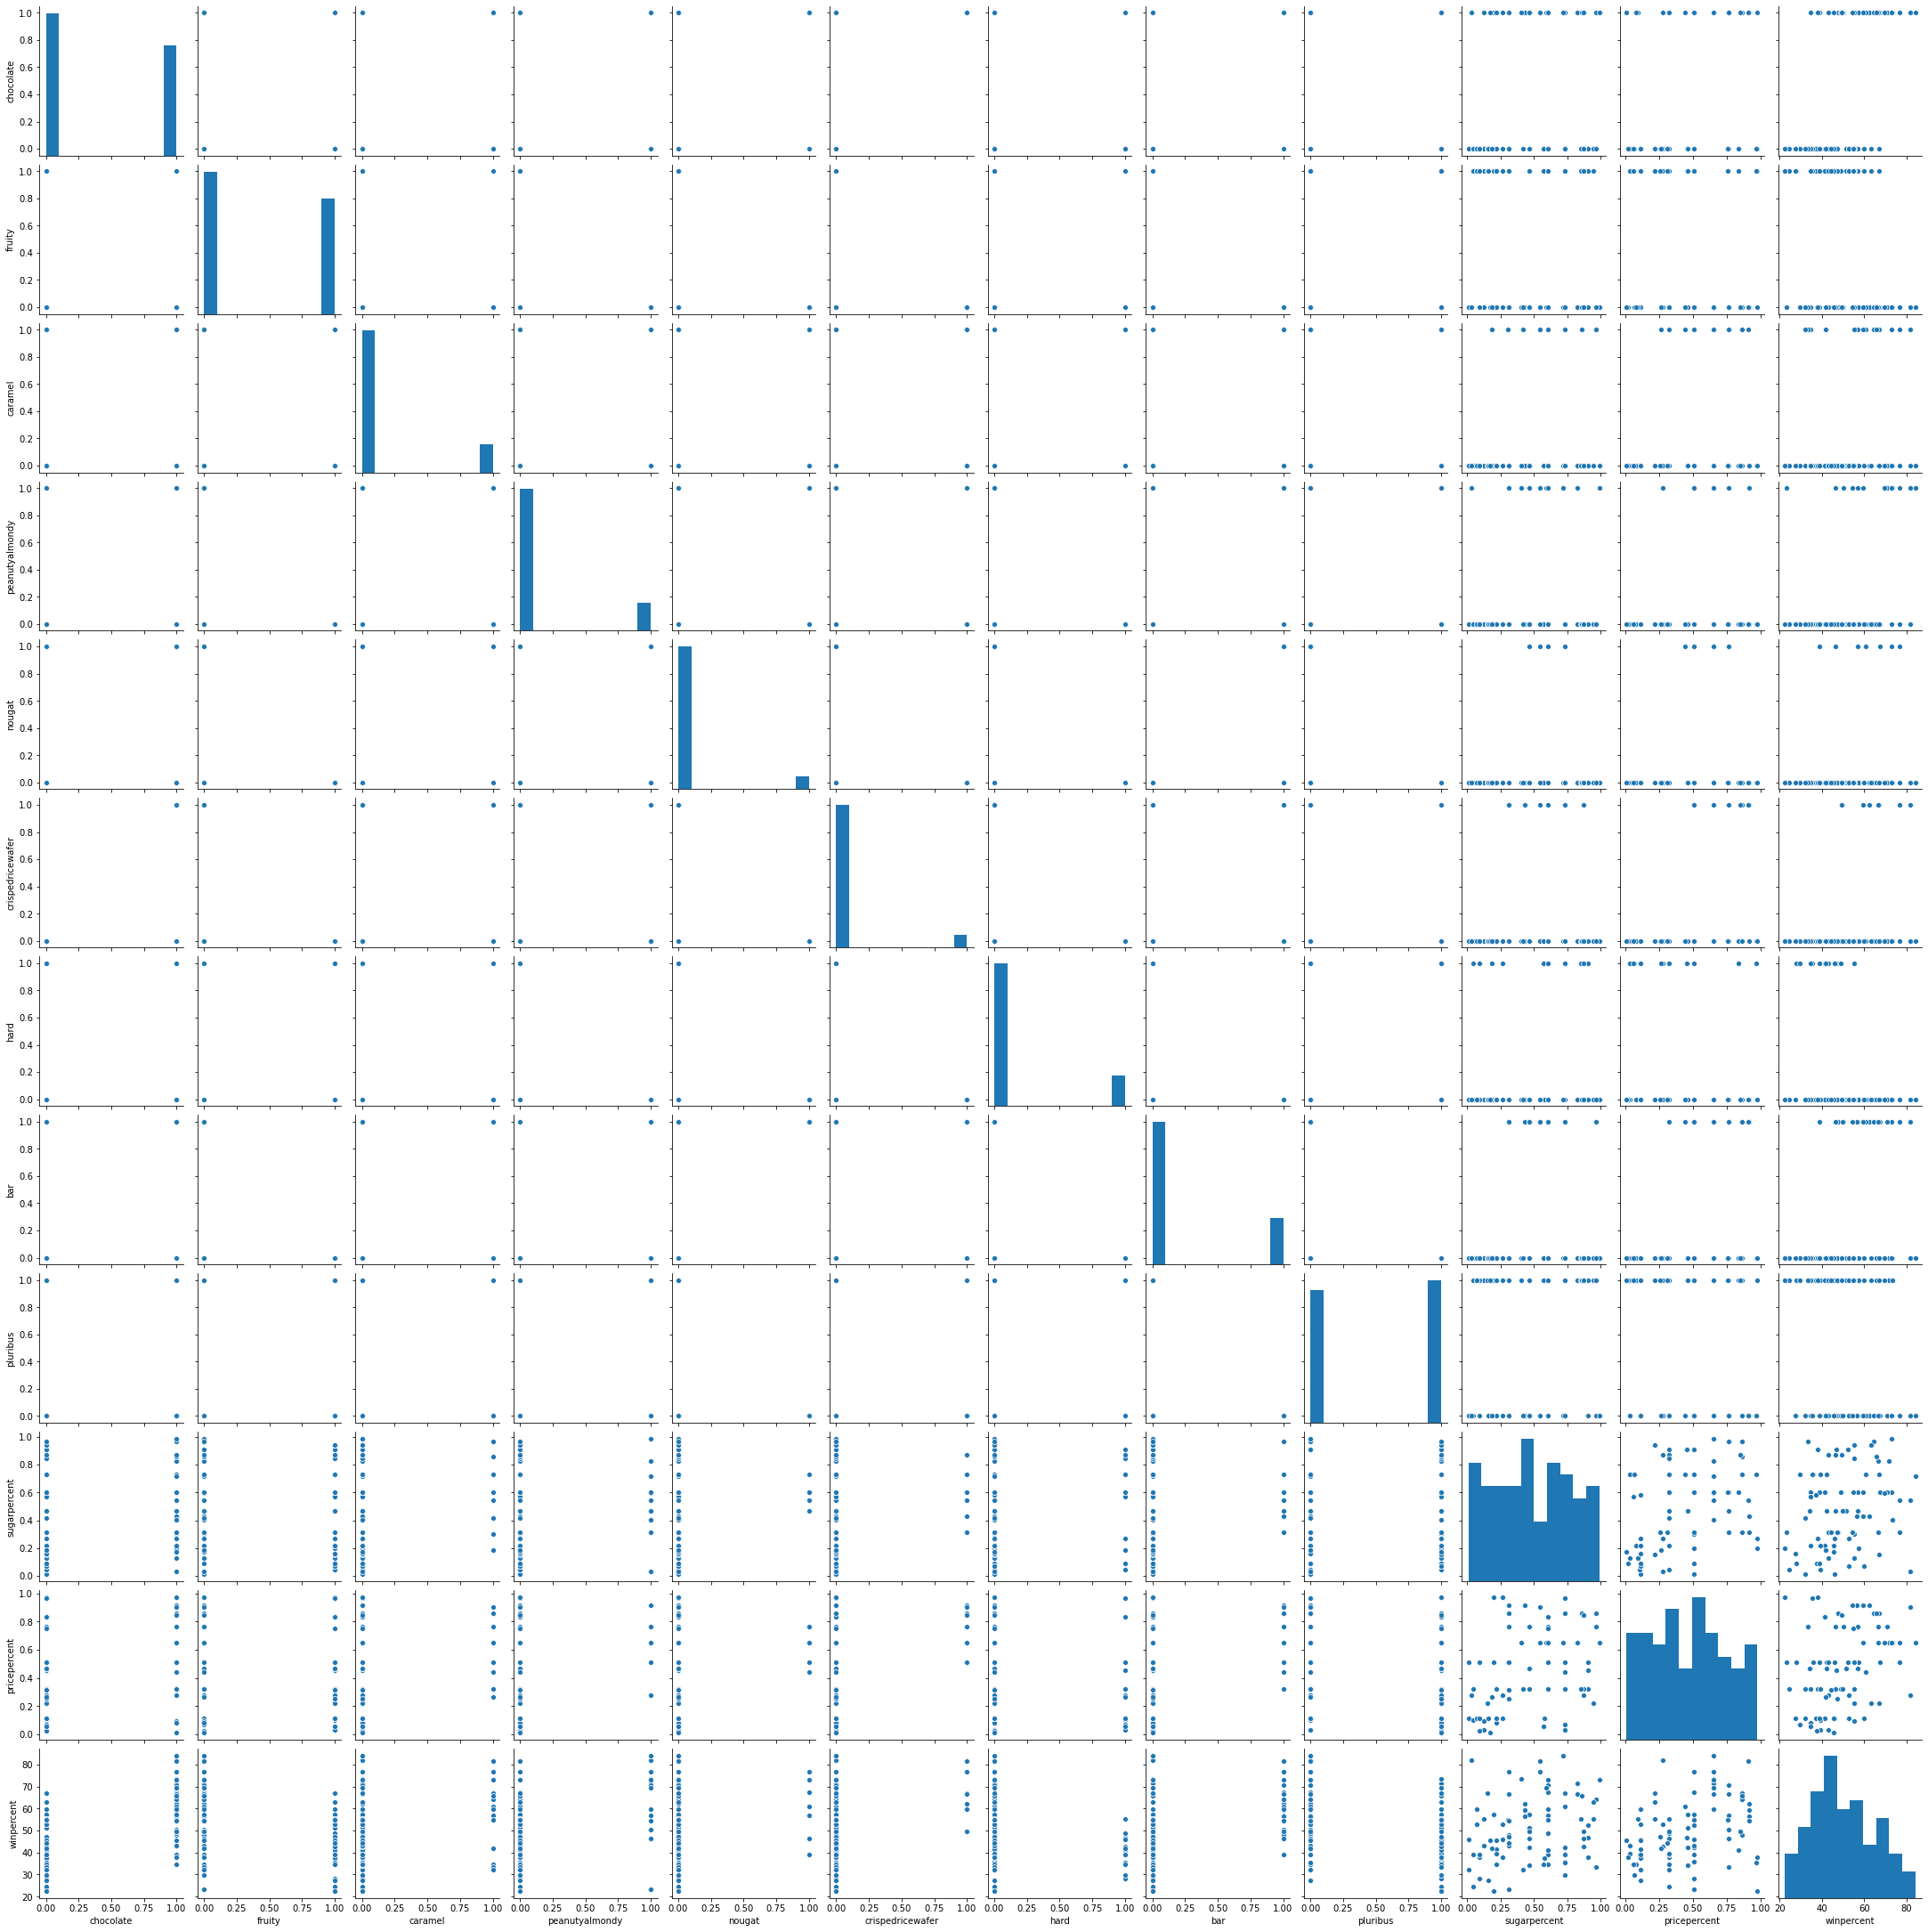

In [13]:
sns.pairplot(data)

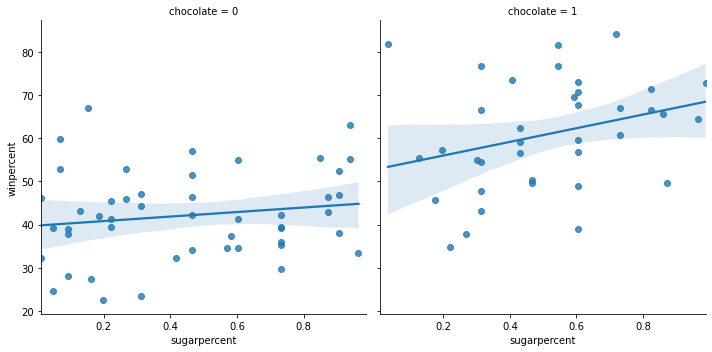

In [14]:
# assumption: sugar impacts the win percent.
sns.lmplot(x="sugarpercent", y="winpercent", col='chocolate', data=data)

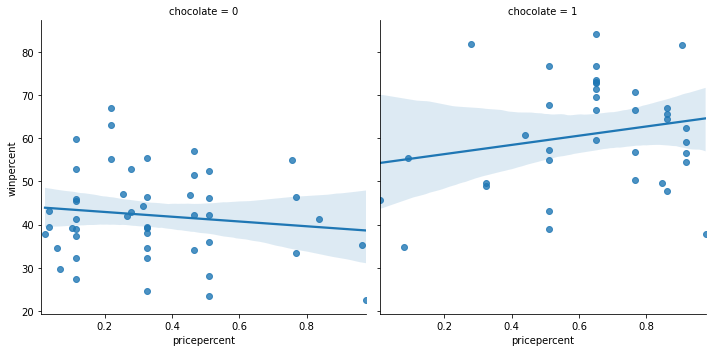

In [15]:
# assumption: sugar impacts the win percent.
sns.lmplot(x="pricepercent", y="winpercent", col='chocolate', data=data)

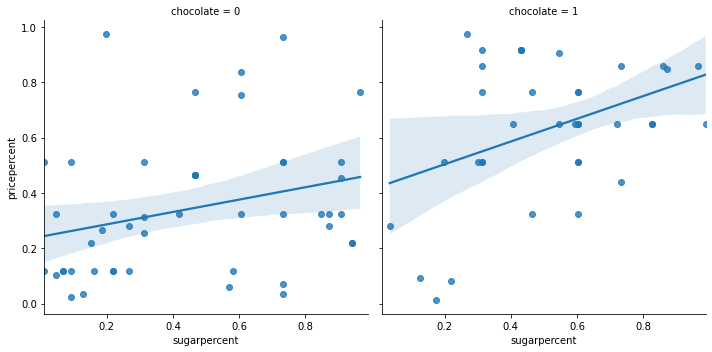

In [16]:
sns.lmplot(x="sugarpercent", y="pricepercent", col='chocolate', data=data)

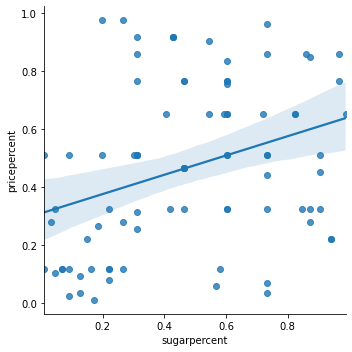

In [17]:
sns.lmplot(x="sugarpercent", y="pricepercent", data=data)

There is a multicollinearity between the 2 variables so I will remove one variable later on. 

## PCA + k-means algorithm

- to visualize data in 2D
- find patterns between clusters

In [18]:
data_km = data.copy()

In [19]:
data_km.set_index('competitorname', inplace = True)

In [20]:
#normalize 
standard_scaler = StandardScaler()
data_norm = standard_scaler.fit_transform(data_km)

0.9707115231765265


Text(0, 0.5, '% variance')

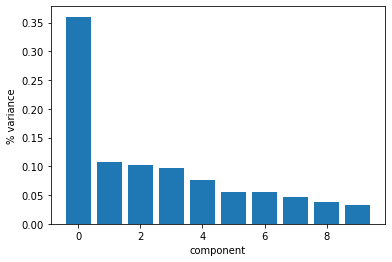

In [21]:
pca = PCA(n_components=10)
pca_ft = pca.fit_transform(data_norm)
num_components = range(pca.n_components_)
all_var = np.sum(pca.explained_variance_ratio_)
print(all_var)
plt.bar(num_components,pca.explained_variance_ratio_)
plt.xlabel('component')
plt.ylabel('% variance')

In [22]:
# reduce the dimensions
pca = PCA(n_components=2)
pca_ft = pca.fit_transform(data_norm)
num_components = range(pca.n_components_)
all_var = np.sum(pca.explained_variance_ratio_)
print(all_var)

0.467988359547815


In [23]:
df_silhouette = pd.DataFrame({'ss_score':[],'n_cluster':[]})
for i in range(2,10):
    km = KMeans(n_clusters = i, init = 'random', max_iter = 50, n_init = 10, random_state = 42)
    cluster_labels = km.fit_predict(pca_ft)
    ss_avg = metrics.silhouette_score(pca_ft, cluster_labels)
    df_silhouette = df_silhouette.append({'ss_score':ss_avg, 'n_cluster':i}, ignore_index = True)

,ss_score,n_cluster
0,0.571840,2.0
1,0.556203,3.0
2,0.470821,4.0
3,0.449772,5.0
4,0.472985,6.0
5,0.470831,7.0
6,0.473853,8.0
7,0.459768,9.0


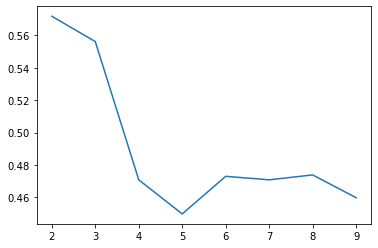

In [24]:
display(df_silhouette)
df_silhouette.set_index('n_cluster', inplace = True)
plt.plot(df_silhouette['ss_score'])

In [25]:
kmeans = KMeans(n_clusters = 3, init = 'random', max_iter = 50, n_init = 100, random_state = 42)
kmeans.fit(pca_ft)
kmeans.predict(pca_ft)

array([0, 0, 1, 1, 1, 2, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 1, 2, 0, 0, 0, 2, 2, 1, 2, 2,
       1, 1, 0, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 0, 1, 1, 1, 1, 2])

remarks: even though silhouette score suggested 2 clusters only, I put 8 clusters because I want to see in detail what is happening within the clusters.This is more to observe candies that have similar characteristics. 

In [26]:
data_km['cluster_label'] = kmeans.labels_
data_km['pc1'] = pd.Series(pca_ft[:,0]).values
data_km['pc2'] = pd.Series(pca_ft[:,1]).values

In [27]:
data_km['cluster_label'].unique()

array([0, 1, 2], dtype=int64)

In [28]:
data_km.reset_index(inplace = True)

In [29]:
colors =  {0:"red", 1: "green",2: "blue", 3: "purple",4:"orange", 5: "yellow",6: "pink", 7: "black"} 
data_km['colors'] = data_km["cluster_label"].apply(lambda c: colors[c])

In [30]:
data_km_mean = data_km.copy()

In [31]:
data_km_mean.groupby('cluster_label').mean().sort_values('winpercent', ascending = False)

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,pc1,pc2
cluster_label,,,,,,,,,,,,,,
0,0.909091,0.000000,0.727273,0.363636,0.636364,0.272727,0.000000,1.000000,0.000000,0.636909,0.688727,62.987308,3.454860,1.478112
2,1.000000,0.000000,0.086957,0.391304,0.000000,0.173913,0.000000,0.434783,0.391304,0.490348,0.698739,61.857215,1.753291,-1.017720
1,0.078431,0.745098,0.078431,0.019608,0.000000,0.000000,0.294118,0.000000,0.686275,0.439235,0.317804,42.379384,-1.535866,0.140163


Remarks: Based on the obseration per cluster, cluster 1 is has the highest win percentage. By checking the mean values per characteristic it's observable that chocolate and peanutyalmondy is present on the top 2 win percent.  

In [32]:
source = ColumnDataSource(data_km)
plot = figure(x_axis_label = 'pc1',
             y_axis_label = 'pc2', title = "Clustering results (Hover on the data!)", width = 900, height = 500)

mapper = CategoricalColorMapper(palette = ['#27AE60','#F1C40F'], factors = ['0','1'])
plot.circle(x='pc1',y = 'pc2', source = source, legend_label = 'cluster',color = 'colors', alpha = .8, size = 13) #, color = {'cluster_label':'cluster_label','transform':mapper}
hover = HoverTool(tooltips = [('chocolate','@chocolate'),
                              ('cluster_label','@cluster_label'),
                              ('fruity','@fruity'),
                              ('caramel','@caramel'),
                              ('peanutyalmondy','@peanutyalmondy'),
                              ('nougat','@nougat'),
                              ('crispedricewafer','@crispedricewafer'),
                              ('hard','@hard'),
                              ('bar','@bar'),
                              ('sugarpercent','@sugarpercent'),
                              ('pricepercent','@pricepercent'),
                              ('competitorname','@competitorname'),
                              ('winpercent','@winpercent'),
                             ]) # 
plot.add_tools(hover)
show(plot,notebook_handle = True)


(you can hover on the data points to see more) <br>
Remarks: This is the 2D represenation of the cluster results. From the left in (black circles) you can see the groups that has the lowest win percentage and the Observable characteristic they have is fruity. On the very right (green circles) is the cluster 1 which has the highest win percentage group among all. 

In [33]:
from bokeh.embed import file_html
from bokeh.resources import CDN 

html = file_html(plot, CDN, "my plot")